In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime
import json
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
from tqdm.notebook import tqdm
tqdm.pandas()
import requests
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/var/folders/zr/0mklm_6s5zg8kfjw3xy0w3bh0000gn/T/ipykernel_81602/3700585894.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import sys
sys.path.append('/Users/tylermartin/Documents/programming/london_weather/london-weather')

from datetime import timedelta
from matplotlib import cm
from matplotlib.colors import Normalize

from make_plots import apply_mdates

In [3]:
TOP_DIR='/Users/tylermartin/Documents/programming/london_weather'
DRIVE_DIR='/Users/tylermartin/Google Drive/My Drive/projects/london_weather'

In [4]:
def f_to_c(f):
    return round((f-32)*5/9,2)

In [5]:
files =list(Path(TOP_DIR).glob('data/*.parquet'))
files.sort()

In [6]:
df=pd.concat([pd.read_parquet(f) for f in tqdm(files)])
df['temp_c']=df.temp.apply(f_to_c)

  0%|          | 0/3733 [00:00<?, ?it/s]

In [9]:
df['hour']=df.ts.dt.hour

In [19]:
df['ts_hour']=pd.to_datetime(df.hour,unit='h')
df.ts_hour=df.ts_hour+timedelta(days=30*365+7)

In [21]:
df['date']=df.ts.dt.floor('D')

In [23]:
dates=df.date.unique()

In [25]:
df.set_index('date',inplace=True)

In [26]:
d=dates[0]

  0%|          | 0/3733 [00:00<?, ?it/s]

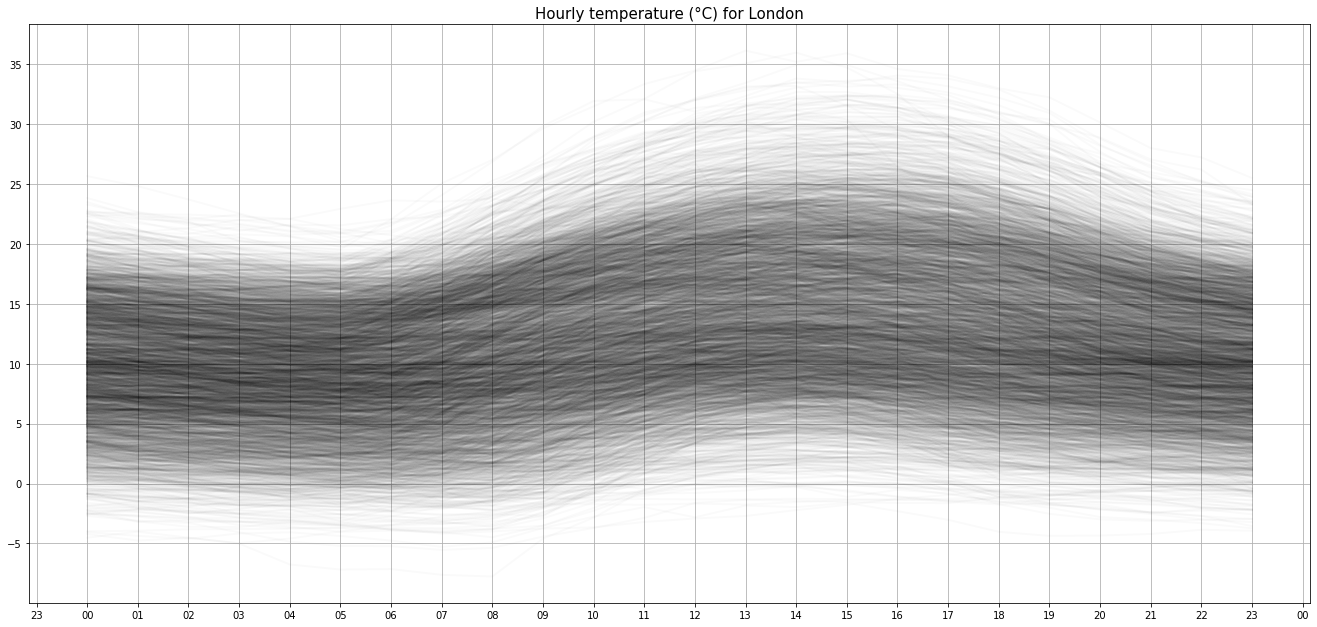

In [58]:
freq='hour_no_date'
y=np.arange(-5,40,5)

plt.figure(facecolor='white')
c='black'
ls='-'
lw=2
alpha=.02
for date in tqdm(dates):
    to_plot=df.loc[date]
    _ = plt.plot(to_plot.ts_hour,to_plot.temp_c,c=c,alpha=alpha,ls=ls,label=None,lw=lw)
    
    
fig, ax = plt.gcf(), plt.gca()
ax=apply_mdates(ax,freq)

_ = ax.grid()
_ = ax.set_yticks(y)
title_text = f'Hourly temperature (°C) for London'
_ = ax.set_title(title_text, size=15)
_=plt.tight_layout()
fig.set_size_inches(20,10)
path=f'{TOP_DIR}/plots/hourly.png'
plt.savefig(path,dpi=300)

drive_path=f'{DRIVE_DIR}/hourly.png'
plt.savefig(drive_path,dpi=300)